<a href="https://colab.research.google.com/github/BJahanyar/Advanced_Python/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf

In [94]:
train = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/train.csv')
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [95]:
#PreProcessing
train= train.replace(["female" , "male"] , [0 , 1])
train = train.replace(["C" , "S" , "Q"] , [0 , 1 , 2])
train = train.fillna(0)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0


In [96]:
Y_train =  np.array(train[['Survived']])
X_train = np.array(train[['Pclass', 'Sex', 'Fare', 'Age', 'SibSp', 'Parch', 'Embarked']])
print(X_train.shape , Y_train.shape)

(891, 7) (891, 1)


In [97]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(7,activation='sigmoid'),
                                    tf.keras.layers.Dense(8,activation='relu'),
                                    tf.keras.layers.Dense(6,activation='relu'),
                                    tf.keras.layers.Dense(4,activation='relu'),
                                    tf.keras.layers.Dense(2,activation='softmax')
])

In [98]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [99]:
output=model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5836
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6341
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.6588
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6708 - accuracy: 0.6599
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.6655
Epoch 6/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6543 - accuracy: 0.6723
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6437 - accuracy: 0.6712
Epoch 8/500
28/28 [==============================] - 0s 1ms/step - loss: 0.6287 - accuracy: 0.6723
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6756
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6768
Epoch 11/

Text(0, 0.5, 'Loss')

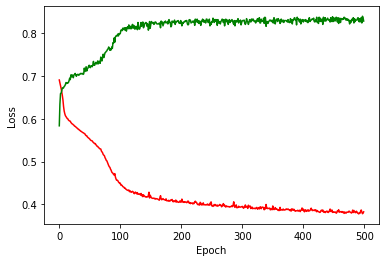

In [100]:
plt.plot(output.history['loss'], c = 'red')
plt.plot(output.history['accuracy'], c ='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [101]:
test = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/test.csv')
test = test.replace(['female','male'],[0, 1])
test = test.replace(['S','C','Q'],[0, 1, 2])
test=test.fillna(0)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0


In [102]:
survived = pd.read_csv('drive/MyDrive/Colab Notebooks/Titanic Dataset/gender_submission.csv')
survived.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [103]:
X_test = np.array(test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
Y_test = np.array(survived[['Survived']])
print(X_train.shape , Y_train.shape)


(891, 7) (891, 1)


In [104]:
from keras import layers
layer = layers.Normalization()
layer.adapt(X_test)
X_test = layer(X_test).numpy()

In [105]:
acc=model.evaluate(X_test,Y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2251 - accuracy: 0.9019


In [106]:
Kelly=np.array([3,1,27,0,0,8.6,0])
Kelly=Kelly.reshape(1,7)
y_pred=model.predict(Kelly)
prediction=np.argmax(y_pred)
print('prediction  ----> ',prediction)

prediction  ---->  1


In [107]:
#___________KNN_____________#
class kNearestNeighbors(): 


    def __init__(self, k):
        self.k = k 


    def fit(self, X_train , y_train): 
        self.X_train = X_train
        self.y_train = y_train
        self.number_classes = len(np.unique(y_train))


    def nearNeighbors(self , X_test):
        dist = np.sqrt(np.sum((X_test - self.X_train)**2 ,axis=1))
        near_neighbors = np.argsort(dist)[:self.k]
        return near_neighbors

        
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        y = np.argmax(np.bincount(self.y_train[near_neighbors]))
        return y

    def Evaluate (self, X_test, y_test):
        Succes=0
        Test_len = len(X_test)
        for i in range (Test_len):
            Prediction = self.predict(X_test[i])
            if Prediction == y_test[i]:
                Succes = Succes+1 
        Accuracy = Succes / Test_len
        return Accuracy

In [108]:
Y_train = Y_train.reshape(891,)
KNN = kNearestNeighbors(k=5)
KNN.fit(X_train,Y_train)
y = []
for xts in X_test:
    y.append(KNN.predict(xts))

print(' Accuracy of ___________KNN_____________ is', KNN.Evaluate(X_test, Y_test))

 Accuracy of ___________KNN_____________ is 0.6363636363636364


In [109]:
#___________Adaline_____________#

from numpy.linalg import inv
class AdalineClassifi(): 


    def __init__(self):
        pass

    def fit(self, x_train, y_train):
        # W = (X.T * X)^-1 * (X.T * Y)
        self.w=np.matmul(inv(np.matmul(x_train.T,x_train)),np.matmul(x_train.T,y_train))
        return self.w
        
    def predict(self, x_test):
        y_predict = np.matmul(x_test, self.w)
        y=[]
        for i in range(len(y_predict)):
            if y_predict[i]<0.5:
                y.append(0)
            else:
                y.append(1)  
        y=np.array(y)
        return y
    
    def Evaluate (self, X_test, Y_test):
        pred = self.predict(X_test)
        Succes=0
        for i in range (len(X_test)):
           if pred[i] == Y_test[i]:
               Succes = Succes+1 
           Accuracy = Succes / len(X_test)
        return Accuracy

In [110]:
model = AdalineClassifi()
model.fit(X_train,Y_train)
print(model.predict(X_test))
print(' Accuracy of ___________Adaline_____________ is', model.Evaluate(X_test, Y_test))

[0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 0 0 0 0 0]
 Accuracy of ___________Adaline_____________ is 0.8157894736842105


In [111]:
#___________Perceptron_____________

class perceptron:
    def __init__ (self):
        pass

    def fit(self, X, Y  , epochs):

        lr = 0.000001
        self.w = np.random.rand(7)
        self.b = np.random.rand(1)
        self.Error = []
        for i in range (epochs):
            for i in range (X.shape[0]):
                y_pred = np.matmul(X[i], self.w ) + self.b
                e = Y[i] - y_pred
                self.w += lr * X[i] * e
                self.b += lr * e 

                Y_pred = np.matmul(X, self.w) + self.b
                error = np.mean(np.abs(Y - Y_pred))
                self.Error.append(error)
        np.save('w', self.w)
        np.save('b', self.b)
        return self.Error

    def predict (self, X):
        w = np.load('w.npy')
        b = np.load('b.npy')
        Y_pred=np.matmul(X, w) + b
        return  Y_pred

    def evaluate(self, X, Y):
        w = np.load('w.npy')
        b = np.load('b.npy')
        Y_pred = np.matmul(X, w) + b
        evaluation = np.mean(np.abs(Y - Y_pred))
        return evaluation

In [112]:
model = perceptron()
model.fit(X_train, Y_train ,2)
model.predict(X_test)
model.evaluate(X_test, Y_test)
print('Accuracy of ___________Perceptron_____________ is:', model.evaluate(X_test, Y_test) )

Accuracy of ___________Perceptron_____________ is: 0.8988500943692814
